In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1077,ham,"Yep, by the pretty sculpture",NaN,NaN,NaN
2220,ham,But really quite funny lor wat... Then u shd h...,NaN,NaN,NaN
4661,ham,Ladies first and genus second k .,NaN,NaN,NaN
651,ham,I'm gonna say no. Sorry. I would but as normal...,NaN,NaN,NaN
1623,ham,"Ah, well that confuses things, doesnÛ÷t it?",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
3288,spam,Camera - You are awarded a SiPix Digital Camer...
1700,ham,Please ask mummy to call father
4601,ham,\Hey j! r u feeling any better
3855,ham,I'm ok. Will do my part tomorrow
220,ham,Ok no prob. Take ur time.


In [ ]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3789,ham,I love you !!! You know? Can you feel it? Does...
3463,ham,My phone
2028,ham,Kallis is ready for bat in 2nd innings
3494,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...
4309,spam,Someone U know has asked our dating service 2 ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# pip install numpy==1.22.4



In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# check for duplicate values
df.duplicated().sum()

403

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

## 2.EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


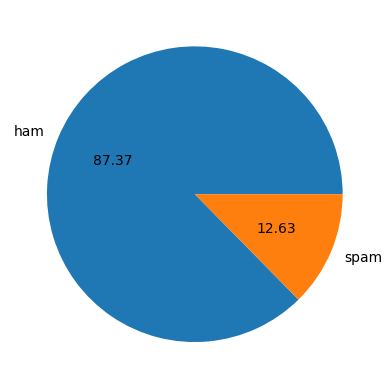

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.loc[:, 'num_characters'] = df['text'].apply(len)
df=df.copy()

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

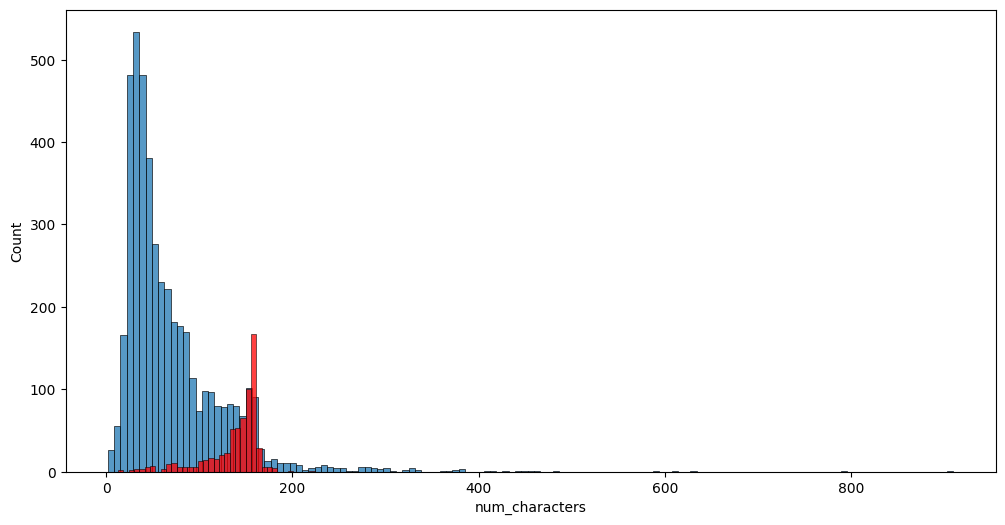

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

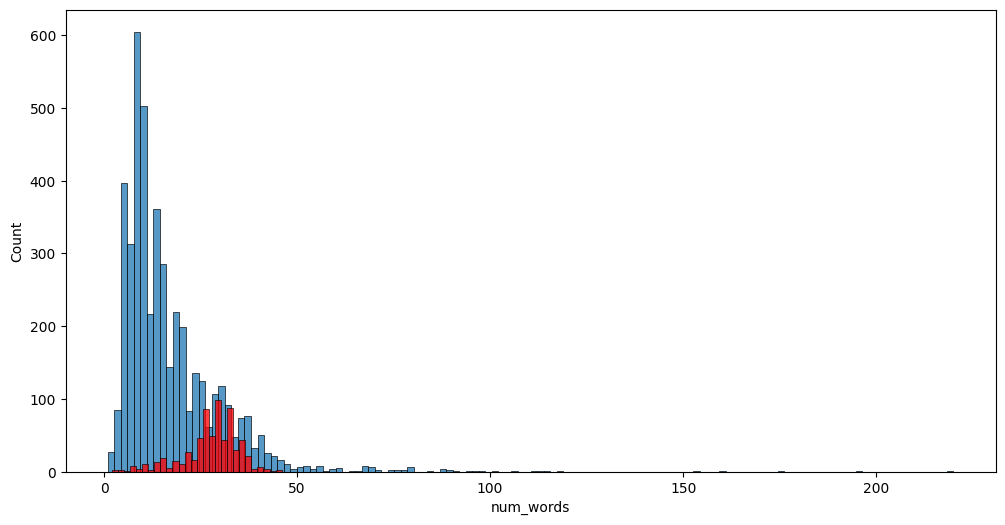

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

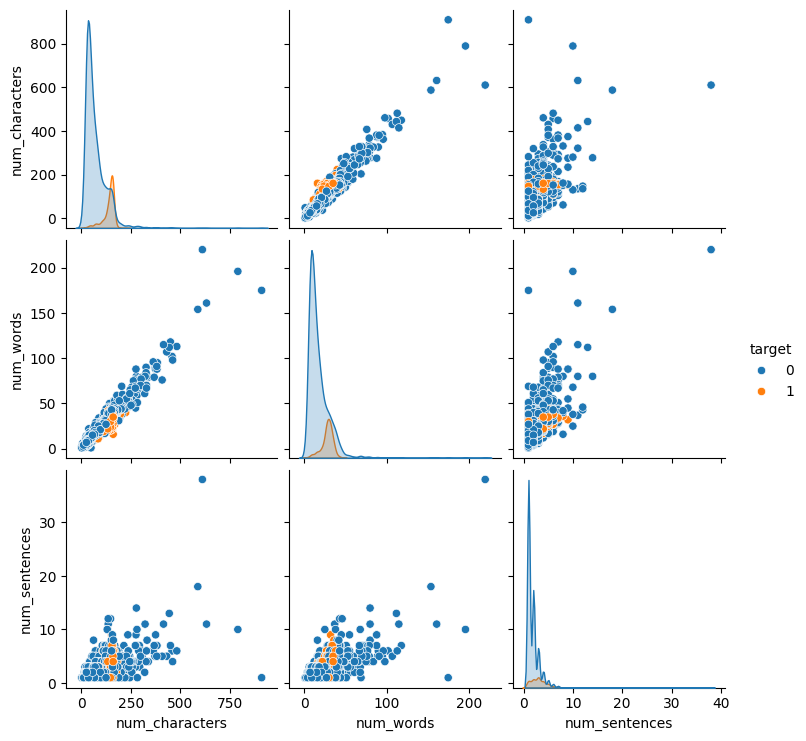

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

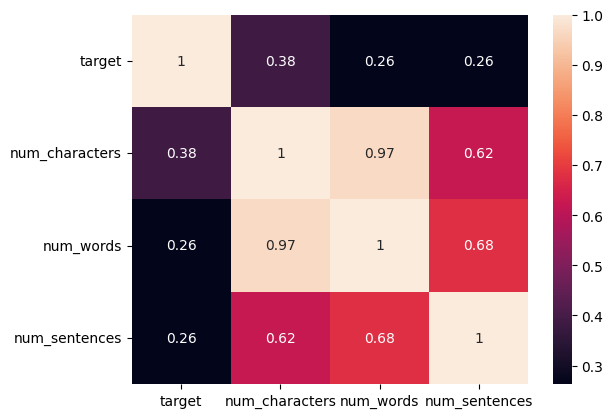

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'text' is the column with the string values causing the error
# Replace 'text' with the actual name of your text column

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical features
corr_matrix = numerical_df.corr()

# Generate the heatmap using the correlation matrix
sns.heatmap(corr_matrix, annot=True)

In [ ]:
from textblob import TextBlob
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

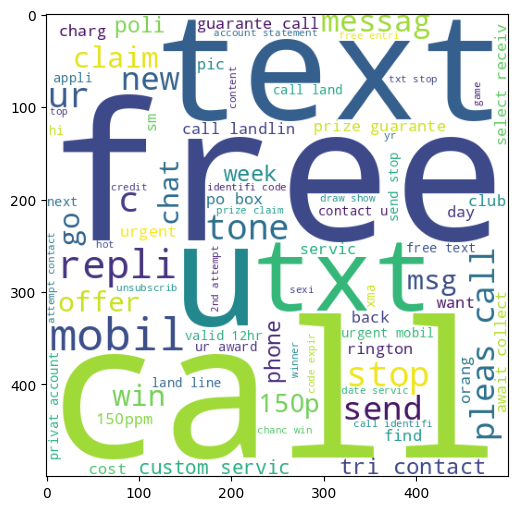

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

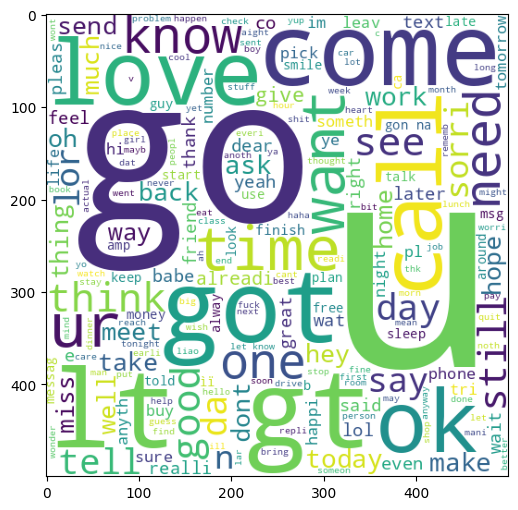

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9939

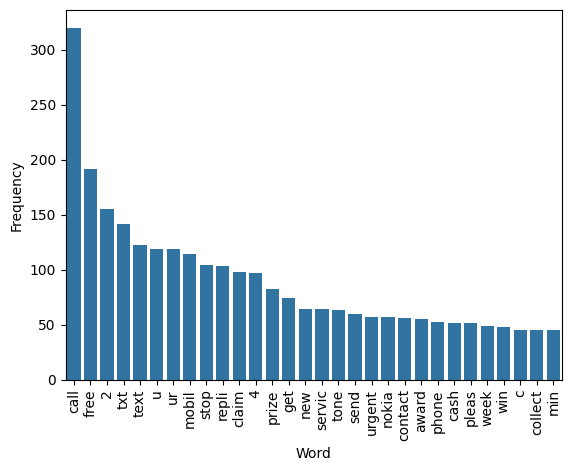

In [ ]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the Counter object
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use the 'x' and 'y' keywords to specify the columns for the barplot
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

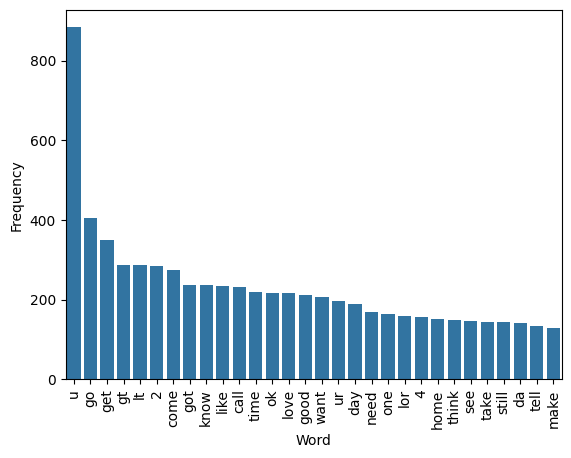

In [ ]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the Counter object
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use the 'x' and 'y' keywords to specify the columns for the barplot
sns.barplot(x='Word', y='Frequency', data=ham_corpus_df)

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
pip install textblob


In [ ]:
from textblob import TextBlob
from nltk import pos_tag
import nltk
from collections import Counter
import pandas as pd

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Assuming `transform_text` function from your previous code is available

def add_additional_features(df):
    # Sentiment Analysis
    df['sentiment_polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # POS Tag Counts
    def pos_counts(text):
        tokens = nltk.word_tokenize(text)
        pos_tags = pos_tag(tokens)
        pos_count_dict = {
            'num_nouns': sum(1 for word, pos in pos_tags if pos.startswith('N')),
            'num_verbs': sum(1 for word, pos in pos_tags if pos.startswith('V')),
            'num_adjectives': sum(1 for word, pos in pos_tags if pos.startswith('J')),
        }
        return pd.Series(pos_count_dict)

    pos_features = df['text'].apply(pos_counts)
    df = pd.concat([df, pos_features], axis=1)

    # Keyword Density Calculation (Dynamic spam keyword generation)
    all_words = []
    for text in df['text']:
        transformed_text = transform_text(text)  # Apply text transformation
        all_words.extend(transformed_text.split())

    # Calculate the frequency of each word
    word_freq = Counter(all_words)

    # Identify the top N most common words (spam keywords)
    top_spam_words = word_freq.most_common(50)  # You can adjust the number as needed
    spam_keywords = {word for word, freq in top_spam_words}  # Using a set for faster lookups

    # Keyword Density Function (uses dynamically generated spam_keywords)
    def keyword_density(text):
        words = nltk.word_tokenize(transform_text(text).lower())  # Transform and tokenize the text
        spam_keyword_count = sum(1 for word in words if word in spam_keywords)
        density = spam_keyword_count / len(words) if words else 0  # Avoid division by zero
        return density

    # Apply keyword density to each row in the DataFrame
    df['keyword_density'] = df['text'].apply(keyword_density)

    return df

# Add these features to your DataFrame
df = add_additional_features(df)

# Display a sample to verify features are added correctly
df.sample(5)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,target,text,num_characters,num_words,num_sentences,transformed_text,sentiment_polarity,num_nouns,num_verbs,num_adjectives,keyword_density
3770,0,"Hi, wlcome back, did wonder if you got eaten b...",81,19,1,hi wlcome back wonder got eaten lion someth no...,0.1,5,4,1,0.300000
1863,0,I'll let you know when it kicks in,34,9,1,let know kick,0.0,0,3,0,0.333333
4883,0,For many things its an antibiotic and it can b...,113,21,1,mani thing antibiot use chest abdomen gyna inf...,0.5,5,3,3,0.000000
5495,0,"Good afternoon, my love ... How goes your day ...",118,29,4,good afternoon love goe day sleep hope well bo...,0.6,6,5,1,0.500000
2729,1,Urgent! Please call 09066612661 from your land...,166,34,3,urgent pleas call 09066612661 landlin complime...,0.3,16,2,2,0.136364


## 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)
print("Model saved.")

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
Model saved.


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf --> MNB
!pip install xgboost

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
svc=SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KNN' : knc,
    'MNB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bagging': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [ ]:
param_grids = {
    'SVC': {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'sigmoid']},
    'KNN': {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']},
    'MNB': {'alpha': [0.1, 0.5, 1]},
    'DT': {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5]},
    'LR': {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
    'RF': {'n_estimators': [50, 100], 'max_depth': [5, 10]},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.1, 1]},
    'Bagging': {'n_estimators': [50, 100], 'max_samples': [0.5, 1.0]},
    'ETC': {'n_estimators': [50, 100], 'max_depth': [5, 10]},
    'GBDT': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    'XGB': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
}


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
def train_classifier_with_randomized_tuning(clf, param_grid, X_train, y_train, X_test, y_test, n_iter=10):
    # Use RandomizedSearchCV to tune hyperparameters
    random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter, cv=3, n_jobs=-1, random_state=42)

    # Fit the model
    random_search.fit(X_train, y_train)

    # Get the best model and evaluate on the test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Adjust depending on your target variable

    return accuracy, precision, random_search.best_params_

In [ ]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
# accuracy_scores = []
# precision_scores = []
# best_params = []

# # Loop through each classifier and perform training and hyperparameter tuning
# for clf_name, clf in clfs.items():
#     acc, prec, params = train_classifier_with_randomized_tuning(clf, param_grids[clf_name], X_train, y_train, X_test, y_test)
#     print(f"{clf_name} - Accuracy: {acc}, Precision: {prec}, Best Params: {params}")

#     # Append the results
#     accuracy_scores.append(acc)
#     precision_scores.append(prec)
#     best_params.append(params)

In [ ]:
accuracy_default = []
precision_default = []
accuracy_tuned = []
precision_tuned = []
accuracy_stemmed_tuned = []
precision_stemmed_tuned = []
accuracy_len_stemmed_tuned = []
precision_len_stemmed_tuned = []

for clf_name, clf in clfs.items():
    # Default Model (using default parameters)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_default.append(accuracy_score(y_test, y_pred))
    precision_default.append(precision_score(y_test, y_pred))

    # Hyperparameter Tuning using RandomizedSearchCV
    acc, prec, params = train_classifier_with_randomized_tuning(clf, param_grids[clf_name], X_train, y_train, X_test, y_test)
    accuracy_tuned.append(acc)
    precision_tuned.append(prec)

    # Stemmed and Hyperparameter Tuning
    df['transformed_text_stemmed'] = df['text'].apply(lambda x: " ".join([ps.stem(word) for word in transform_text(x).split()]))
    X_stemmed = tfidf.fit_transform(df['transformed_text_stemmed']).toarray()
    X_train_stemmed, X_test_stemmed, y_train, y_test = train_test_split(X_stemmed, y, test_size=0.2, random_state=2)

    clf.fit(X_train_stemmed, y_train)
    y_pred_stemmed = clf.predict(X_test_stemmed)
    accuracy_stemmed_tuned.append(accuracy_score(y_test, y_pred_stemmed))
    precision_stemmed_tuned.append(precision_score(y_test, y_pred_stemmed))

    # Length, Stemmed and Hyperparameter Tuning
    df['transformed_text_len_stemmed'] = df['text'].apply(lambda x: transform_text(x) + " " + str(len(x.split())))
    X_len_stemmed = tfidf.fit_transform(df['transformed_text_len_stemmed']).toarray()
    X_train_len_stemmed, X_test_len_stemmed, y_train, y_test = train_test_split(X_len_stemmed, y, test_size=0.2, random_state=2)

    clf.fit(X_train_len_stemmed, y_train)
    y_pred_len_stemmed = clf.predict(X_test_len_stemmed)
    accuracy_len_stemmed_tuned.append(accuracy_score(y_test, y_pred_len_stemmed))
    precision_len_stemmed_tuned.append(precision_score(y_test, y_pred_len_stemmed))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_Default': accuracy_default,
    'Precision_Default': precision_default,
    'Accuracy_Tuned': accuracy_tuned,
    'Precision_Tuned': precision_tuned,
    'Accuracy_Stemmed_Tuned': accuracy_stemmed_tuned,
    'Precision_Stemmed_Tuned': precision_stemmed_tuned,
    'Accuracy_Len_Stemmed_Tuned': accuracy_len_stemmed_tuned,
    'Precision_Len_Stemmed_Tuned': precision_len_stemmed_tuned
})

In [ ]:
performance_df

,Algorithm,Accuracy_Default,Precision_Default,Accuracy_Tuned,Precision_Tuned,Accuracy_Stemmed_Tuned,Precision_Stemmed_Tuned,Accuracy_Len_Stemmed_Tuned,Precision_Len_Stemmed_Tuned
0,SVC,0.972921,0.982456,0.978723,0.975410,0.973888,0.982609,0.973888,0.982609
1,KNN,0.905222,1.000000,0.917795,1.000000,0.905222,1.000000,0.904255,1.000000
2,MNB,0.970986,1.000000,0.980658,0.968254,0.971954,1.000000,0.973888,1.000000
3,DT,0.932302,0.833333,0.953578,0.857143,0.929400,0.821782,0.926499,0.810000
4,LR,0.958414,0.970297,0.973888,0.974359,0.958414,0.970297,0.956480,0.969697
5,RF,0.975822,0.982906,0.902321,1.000000,0.972921,0.982456,0.970986,0.973684
6,AdaBoost,0.960348,0.929204,0.973888,0.944000,0.962282,0.962617,0.958414,0.935780
7,Bagging,0.958414,0.868217,0.958414,0.868217,0.956480,0.860465,0.954545,0.858268
8,ETC,0.974855,0.974576,0.880077,1.000000,0.976789,0.967213,0.972921,0.974138
9,GBDT,0.946809,0.919192,0.954545,0.925234,0.948743,0.929293,0.950677,0.930693


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy_Default,0.972921
1,KNN,Accuracy_Default,0.905222
2,MNB,Accuracy_Default,0.970986
3,DT,Accuracy_Default,0.932302
4,LR,Accuracy_Default,0.958414
...,...,...,...
83,AdaBoost,Precision_Len_Stemmed_Tuned,0.935780
84,Bagging,Precision_Len_Stemmed_Tuned,0.858268
85,ETC,Precision_Len_Stemmed_Tuned,0.974138
86,GBDT,Precision_Len_Stemmed_Tuned,0.930693


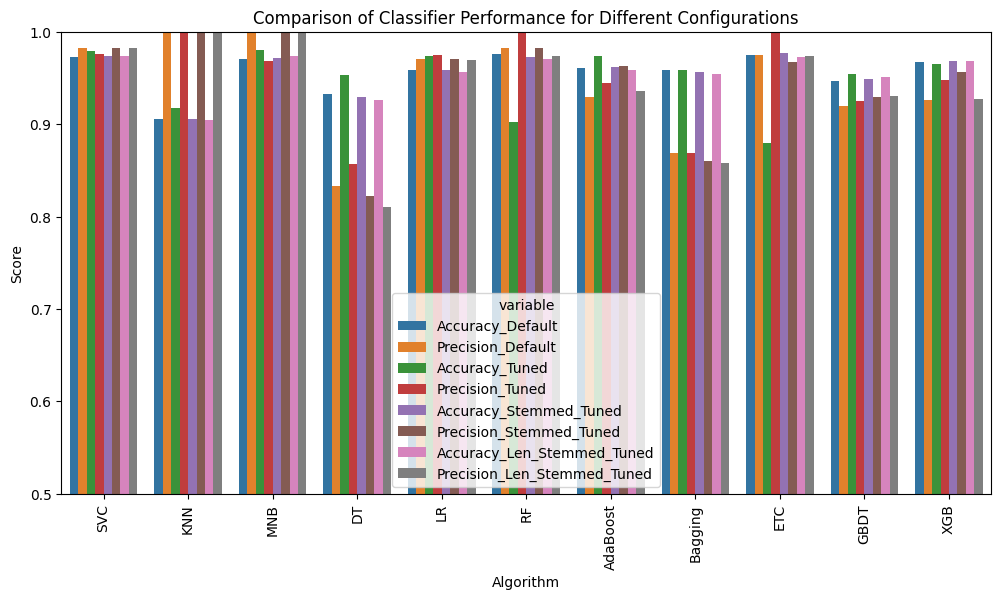

In [ ]:
# print(performance_df.dtypes)
# melted_df = pd.melt(performance_df, id_vars="Algorithm", value_vars=["Accuracy", "Precision"])

# # Step 2: Convert 'value' column to numeric if necessary
# melted_df['value'] = pd.to_numeric(melted_df['value'], errors='coerce')

# # Step 3: Create the plot using Seaborn
# sns.catplot(x='Algorithm', y='value', hue='variable', data=melted_df, kind='bar', height=5)
# plt.ylim(0.5, 1.0)  # Adjust this depending on your range
# plt.xticks(rotation='vertical')
# plt.show()
melted_df = pd.melt(performance_df, id_vars='Algorithm', value_vars=['Accuracy_Default', 'Precision_Default',
                                                               'Accuracy_Tuned', 'Precision_Tuned',
                                                               'Accuracy_Stemmed_Tuned', 'Precision_Stemmed_Tuned',
                                                               'Accuracy_Len_Stemmed_Tuned', 'Precision_Len_Stemmed_Tuned'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='value', hue='variable', data=melted_df)
plt.xticks(rotation=90)
plt.title("Comparison of Classifier Performance for Different Configurations")
plt.ylabel('Score')
plt.ylim(0.5, 1)  # Adjust based on your range
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_Default': accuracy_default,
    'Precision_Default': precision_default,
    'Accuracy_Tuned': accuracy_tuned,
    'Precision_Tuned': precision_tuned,
    'Accuracy_Stemmed_Tuned': accuracy_stemmed_tuned,
    'Precision_Stemmed_Tuned': precision_stemmed_tuned,
    'Accuracy_Len_Stemmed_Tuned': accuracy_len_stemmed_tuned,
    'Precision_Len_Stemmed_Tuned': precision_len_stemmed_tuned
}).sort_values('Precision_Len_Stemmed_Tuned', ascending=False)

In [ ]:
temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),  # Convert keys to a list if necessary
    'Accuracy_Default': accuracy_default,
    'Precision_Default': precision_default,
    'Accuracy_Tuned': accuracy_tuned,
    'Precision_Tuned': precision_tuned,
    'Accuracy_Stemmed_Tuned': accuracy_stemmed_tuned,
    'Precision_Stemmed_Tuned': precision_stemmed_tuned,
    'Accuracy_Len_Stemmed_Tuned': accuracy_len_stemmed_tuned,
    'Precision_Len_Stemmed_Tuned': precision_len_stemmed_tuned
}).sort_values('Precision_Len_Stemmed_Tuned', ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_Default': accuracy_default,
    'Precision_Default': precision_default,
    'Accuracy_Tuned': accuracy_tuned,
    'Precision_Tuned': precision_tuned,
    'Accuracy_Stemmed_Tuned': accuracy_stemmed_tuned,
    'Precision_Stemmed_Tuned': precision_stemmed_tuned,
    'Accuracy_Len_Stemmed_Tuned': accuracy_len_stemmed_tuned,
    'Precision_Len_Stemmed_Tuned': precision_len_stemmed_tuned
}).sort_values('Precision_Len_Stemmed_Tuned', ascending=False)

In [ ]:
# Instead of merging directly, select the desired columns from temp_df
# and rename them to avoid duplication.
cols_to_merge = ['Algorithm', 'Accuracy_Default', 'Precision_Default', 'Accuracy_Tuned', 'Precision_Tuned',
                'Accuracy_Stemmed_Tuned', 'Precision_Stemmed_Tuned', 'Accuracy_Len_Stemmed_Tuned',
                'Precision_Len_Stemmed_Tuned']
temp_df_renamed = temp_df[cols_to_merge].rename(
    columns={
        'Accuracy_Default': 'Accuracy_Default_new',
        'Precision_Default': 'Precision_Default_new',
        'Accuracy_Tuned': 'Accuracy_Tuned_new',
        'Precision_Tuned': 'Precision_Tuned_new',
        'Accuracy_Stemmed_Tuned': 'Accuracy_Stemmed_Tuned_new',
        'Precision_Stemmed_Tuned': 'Precision_Stemmed_Tuned_new',
        'Accuracy_Len_Stemmed_Tuned': 'Accuracy_Len_Stemmed_Tuned_new',
        'Precision_Len_Stemmed_Tuned': 'Precision_Len_Stemmed_Tuned_new'
    }
)

# Now merge with the renamed DataFrame
merged_df = new_df_scaled.merge(temp_df_renamed, on='Algorithm')
merged_df


,Algorithm,Accuracy_Default_x,Precision_Default_x,Accuracy_Tuned_x,Precision_Tuned_x,Accuracy_Stemmed_Tuned_x,Precision_Stemmed_Tuned_x,Accuracy_Len_Stemmed_Tuned_x,Precision_Len_Stemmed_Tuned_x,Accuracy_Default_y,...,Accuracy_Len_Stemmed_Tuned,Precision_Len_Stemmed_Tuned,Accuracy_Default_new,Precision_Default_new,Accuracy_Tuned_new,Precision_Tuned_new,Accuracy_Stemmed_Tuned_new,Precision_Stemmed_Tuned_new,Accuracy_Len_Stemmed_Tuned_new,Precision_Len_Stemmed_Tuned_new
0,SVC,0.972921,0.982456,0.978723,0.975410,0.973888,0.982609,0.973888,0.982609,0.972921,...,0.973888,0.982609,0.972921,0.982456,0.978723,0.975410,0.973888,0.982609,0.973888,0.982609
1,KNN,0.905222,1.000000,0.917795,1.000000,0.905222,1.000000,0.904255,1.000000,0.905222,...,0.904255,1.000000,0.905222,1.000000,0.917795,1.000000,0.905222,1.000000,0.904255,1.000000
2,MNB,0.970986,1.000000,0.980658,0.968254,0.971954,1.000000,0.973888,1.000000,0.970986,...,0.973888,1.000000,0.970986,1.000000,0.980658,0.968254,0.971954,1.000000,0.973888,1.000000
3,DT,0.932302,0.833333,0.953578,0.857143,0.929400,0.821782,0.926499,0.810000,0.932302,...,0.926499,0.810000,0.932302,0.833333,0.953578,0.857143,0.929400,0.821782,0.926499,0.810000
4,LR,0.958414,0.970297,0.973888,0.974359,0.958414,0.970297,0.956480,0.969697,0.958414,...,0.956480,0.969697,0.958414,0.970297,0.973888,0.974359,0.958414,0.970297,0.956480,0.969697
5,RF,0.975822,0.982906,0.902321,1.000000,0.972921,0.982456,0.970986,0.973684,0.975822,...,0.970986,0.973684,0.975822,0.982906,0.902321,1.000000,0.972921,0.982456,0.970986,0.973684
6,AdaBoost,0.960348,0.929204,0.973888,0.944000,0.962282,0.962617,0.958414,0.935780,0.960348,...,0.958414,0.935780,0.960348,0.929204,0.973888,0.944000,0.962282,0.962617,0.958414,0.935780
7,Bagging,0.958414,0.868217,0.958414,0.868217,0.956480,0.860465,0.954545,0.858268,0.958414,...,0.954545,0.858268,0.958414,0.868217,0.958414,0.868217,0.956480,0.860465,0.954545,0.858268
8,ETC,0.974855,0.974576,0.880077,1.000000,0.976789,0.967213,0.972921,0.974138,0.974855,...,0.972921,0.974138,0.974855,0.974576,0.880077,1.000000,0.976789,0.967213,0.972921,0.974138
9,GBDT,0.946809,0.919192,0.954545,0.925234,0.948743,0.929293,0.950677,0.930693,0.946809,...,0.950677,0.930693,0.946809,0.919192,0.954545,0.925234,0.948743,0.929293,0.950677,0.930693


In [ ]:

# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True, random_state=2)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
mnb = MultinomialNB(alpha=0.5)
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=2)
lr = LogisticRegression(penalty='l2', C=1, random_state=2, solver='liblinear')
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=2)
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=2)
bagging = BaggingClassifier(n_estimators=50, max_samples=1.0, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, max_depth=10, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=2)
xgb = XGBClassifier(n_estimators=50, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('knn', knn),
        ('mnb', mnb),
        ('dt', dt),
        ('lr', lr),
        ('rf', rf),
        ('ada', ada),
        ('bagging', bagging),
        ('etc', etc),
        ('gbdt', gbdt),
        ('xgb', xgb)
    ],
    voting='soft'  # 'soft' voting for probabilities; use 'hard' for majority vote
)

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [ ]:
# Base estimators
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True, random_state=2)
knn = KNeighborsClassifier(n_neighbors=5)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=10, random_state=2)
lrc = LogisticRegression(solver='liblinear', C=0.1, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=2)
bc = BaggingClassifier(n_estimators=50, max_samples=0.5, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, max_depth=5, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=2)
xgb = XGBClassifier(n_estimators=50, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=2)

In [ ]:
!pip install scikit-learn  # Make sure scikit-learn is installed
from sklearn.ensemble import StackingClassifier
stacking_clf = StackingClassifier(
    estimators=[
        ('svc', svc),
        ('knn', knn),
        ('mnb', mnb),
        ('dt', dtc),
        ('lr', lrc),
        ('rf', rfc),
        ('ada', abc),
        ('bag', bc),
        ('et', etc),
        ('gbdt', gbdt),
        ('xgb', xgb)
    ],
    final_estimator=RandomForestClassifier(random_state=2),  # Final estimator
    cv=5  # Number of folds for cross-validation in stacking
)

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [ ]:
import pickle
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf, vec_file)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

"""

After running the sms_fraud_detection script in Google Colab:

1.The script generates two files: model.pkl and vectorizer.pkl.

2.These files are typically stored in the directory where the sms_fraud_detection script is located.

3.If they are not found there, check the current working directory using the following command in Google Colab:

import os
print(os.getcwd())


4.Once the files are located, note down their exact paths. For example:

'/path/to/model.pkl'
'/path/to/vectorizer.pkl'

5.In the app.py file, update the file paths for model and vectorizer files

6.Save the changes to app.py.

"""

'''To run this application, follow these steps:

1. Open the **Command Prompt** and navigate to the directory where `app.py` is located.  
   You can use the `cd` command to change the directory to the location of `app.py`.

2. In the same directory, run the following command:  

   streamlit run app.py

3. This will open the **Streamlit** web interface in your default browser.  

4. Enter your message as prompted on the webpage to use the application.'''